<a href="https://colab.research.google.com/github/clydeiii/musicleague/blob/main/musicleague.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook largely created by JammaLamma https://www.reddit.com/user/JammaLamma

In [2]:
!git clone https://github.com/clydeiii/musicleague.git

Cloning into 'musicleague'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 62 (delta 19), reused 50 (delta 13), pack-reused 0
Unpacking objects: 100% (62/62), done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [6]:
# Read in the exported csv files
path = 'musicleague/data/mazalaleague_s1/%s'
competitors = pd.read_csv(path % ('competitors.csv'))
rounds = pd.read_csv(path % ('rounds.csv'))
submissions = pd.read_csv(path % ('submissions.csv'))
votes = pd.read_csv(path % ('votes.csv'))
votes = pd.merge(votes, competitors, how='left', left_on=['Voter ID'], right_on = ['ID'])
submissions = pd.merge(submissions, competitors, how='left', left_on=['Submitter ID'], right_on = ['ID'])

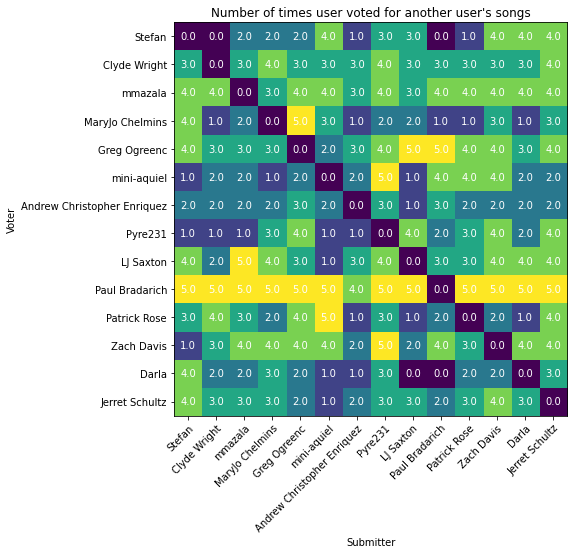

In [13]:
# Join the votes with who submitted
vote_and_submissions = pd.merge(votes, submissions, suffixes = ("_voter", "_submitter"), how='left', left_on=['Round ID','Spotify URI'], right_on = ['Round ID','Spotify URI'])
# Grop the votes by the voter. Calculate both the count of votes and sum of the votes.
votes_for = vote_and_submissions.groupby(['Name_voter', 'Name_submitter']).count()
points_for = vote_and_submissions.groupby(['Name_voter', 'Name_submitter']).sum()
def print_vote_graph(input_df, title):
  voters = competitors['Name'].values.tolist()
  voters.append("Total")
  voters = competitors['Name']
  submitters = voters
  user_indices = dict(map(reversed, enumerate(voters)))
  # Update the array we are going to print out, there is probably a better way to do this
  vote_df = np.zeros((voters.shape[0], voters.shape[0]))
  for index, row in input_df.iterrows():
    voter_index = user_indices[index[0]]
    submitter_index = user_indices[index[1]]
    vote_df[voter_index][submitter_index] += row[0]
  new_vals = np.sum(vote_df, axis=1)
  fig, ax = plt.subplots()
  im = ax.imshow(vote_df)
  vote_df = np.vstack([vote_df, new_vals])
  ax.set_xticks(np.arange(len(voters)))
  ax.set_yticks(np.arange(len(submitters)))
  ax.set_xticklabels(voters)
  ax.set_yticklabels(submitters)
  plt.xlabel("Submitter")
  plt.ylabel("Voter")
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",

  rotation_mode="anchor")
  for i in range(len(voters)):
    for j in range(len(submitters)):
      text = ax.text(j, i, vote_df[i, j], ha="center", va="center", color="w")

  fig.set_size_inches(8, 8)
  ax.set_title(title)
  fig.tight_layout()
  plt.show()

print_vote_graph(votes_for, "Number of times user voted for another user's songs")

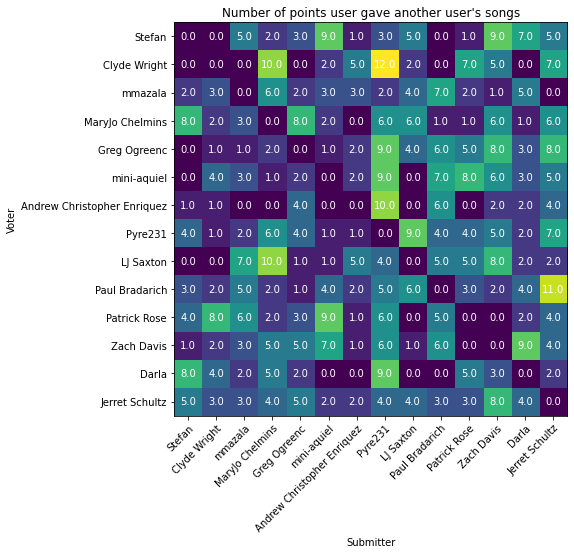

In [14]:
print_vote_graph(points_for, "Number of points user gave another user's songs")